# TELECOM X - PARTE 2: PREVENDO CHURN

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ==== CRIAR PASTA PARA VISUALIZAÇÕES ====
if not os.path.exists('visualizacoes'):
    os.makedirs('visualizacoes')

# ==== LEITURA DOS DADOS ====
df = pd.read_csv('/content/dados_TelecomX.csv')

# 1. ANÁLISE INICIAL E CLASSIFICAÇÃO

In [8]:
print("Primeiras linhas:")
display(df.head())

print("\nInfo do DataFrame:")
df.info()

print("\nColunas categóricas:")
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

print("\nColunas numéricas:")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)

print("\nResumo estatístico:")
display(df.describe())

Primeiras linhas:


,customerID,Churn,gender,SeniorCitizen,customer_Partner,customer_Dependents,tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,...,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num_addons
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,0,...,65.6,593.30,False,False,True,False,False,False,True,3
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,0,...,59.9,542.40,False,False,False,False,False,False,True,1
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,0,...,73.9,280.85,True,False,False,False,False,True,False,1
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,0,...,98.0,1237.85,True,False,False,False,False,True,False,4
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,0,...,83.9,267.40,True,False,False,False,False,False,True,2



Info do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7256 non-null   object 
 1   Churn                                  7032 non-null   float64
 2   gender                                 7256 non-null   object 
 3   SeniorCitizen                          7256 non-null   int64  
 4   customer_Partner                       7256 non-null   int64  
 5   customer_Dependents                    7256 non-null   int64  
 6   tenure                                 7256 non-null   int64  
 7   phone_PhoneService                     7256 non-null   int64  
 8   phone_MultipleLines                    7256 non-null   int64  
 9   internet_OnlineSecurity                7256 non-null   int64  
 10  internet_OnlineBackup                  7256 non-null

,Churn,SeniorCitizen,customer_Partner,customer_Dependents,tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_PaperlessBilling,MonthlyCharges,TotalCharges,num_addons
count,7032.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.1629,0.483600,0.299063,32.395535,0.902839,0.421858,0.285832,0.344542,0.342751,0.289416,0.383958,0.387955,0.593716,64.755423,2280.634213,2.034454
std,0.441782,0.3693,0.499765,0.457879,24.558067,0.296197,0.493890,0.451841,0.475252,0.474662,0.453522,0.486381,0.487318,0.491173,30.125739,2268.632997,1.848105
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000,400.225000,0.000000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,6.000000


# 2. TRATAMENTO DE NULOS E REMOÇÃO DE VARIÁVEL IDENTIFICADORA

In [9]:
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Aqui optamos por remover nulos para manter qualidade dos dados
df = df.dropna()

# customerID é apenas identificador, não entra no modelo
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)



Valores nulos por coluna:
customerID                                 0
Churn                                    224
gender                                     0
SeniorCitizen                              0
customer_Partner                           0
customer_Dependents                        0
tenure                                     0
phone_PhoneService                         0
phone_MultipleLines                        0
internet_OnlineSecurity                    0
internet_OnlineBackup                      0
internet_DeviceProtection                  0
internet_TechSupport                       0
internet_StreamingTV                       0
internet_StreamingMovies                   0
account_PaperlessBilling                   0
MonthlyCharges                             0
TotalCharges                               0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_One year                          0
Contract_Two year           

# 3. ENCODING DAS VARIÁVEIS CATEGÓRICAS

In [10]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

print("\nBase após Label Encoding:")
display(df.head())


Base após Label Encoding:


,Churn,gender,SeniorCitizen,customer_Partner,customer_Dependents,tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,...,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,num_addons
0,0.0,0,0,1,1,9,1,0,0,1,...,65.6,593.30,False,False,True,False,False,False,True,3
1,0.0,1,0,0,0,9,1,1,0,0,...,59.9,542.40,False,False,False,False,False,False,True,1
2,1.0,1,0,0,0,4,1,0,0,0,...,73.9,280.85,True,False,False,False,False,True,False,1
3,1.0,1,1,1,0,13,1,0,0,1,...,98.0,1237.85,True,False,False,False,False,True,False,4
4,1.0,0,1,1,0,3,1,0,0,0,...,83.9,267.40,True,False,False,False,False,False,True,2


# 4. NORMALIZAÇÃO DAS VARIÁVEIS NUMÉRICAS

In [11]:
# Padronizar para regressão logística funcionar bem
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# 5. SALVAR DADOS TRATADOS

In [12]:
df.to_csv('dados_tratados.csv', index=False)

In [ ]:
# ======================================
# 6. SEPARAÇÃO TREINO/TESTE
# ======================================
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



# 6. SEPARAÇÃO TREINO/TESTE


In [14]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 7. ANÁLISE EXPLORATÓRIA (EDA)


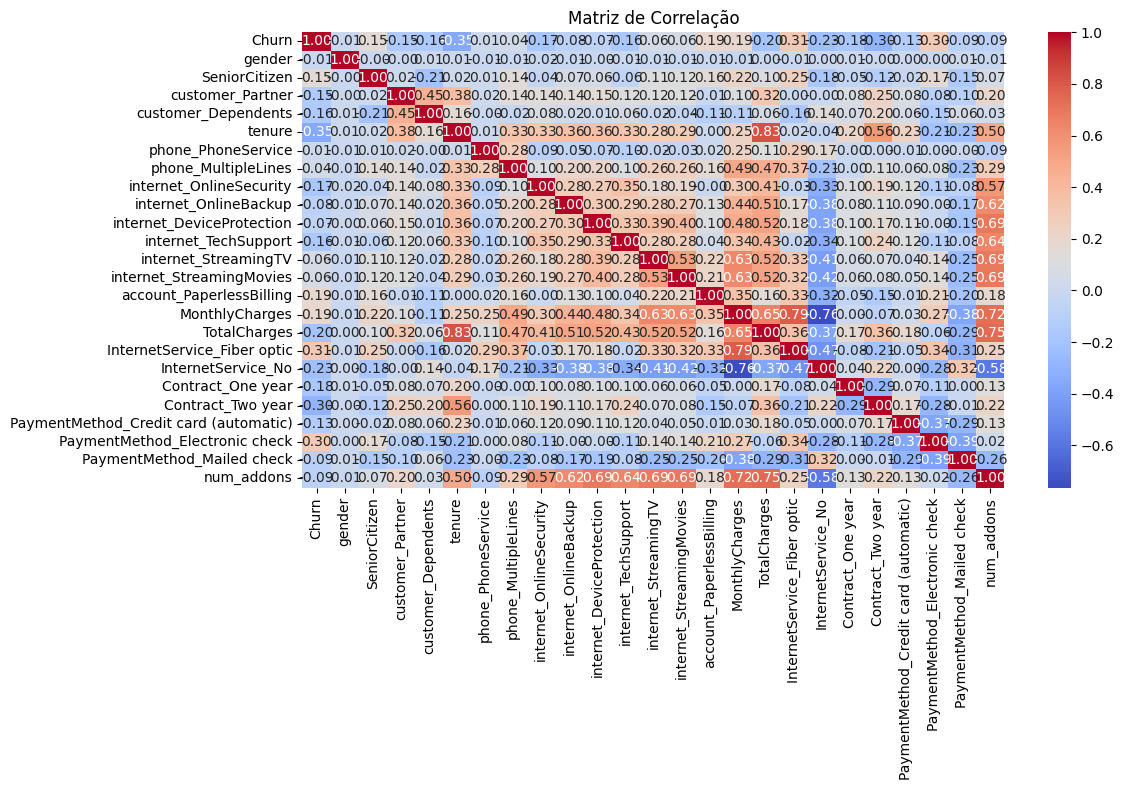

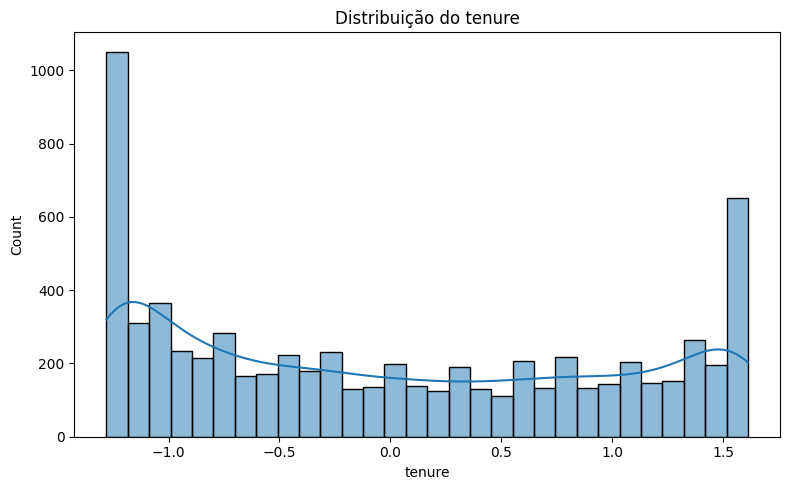

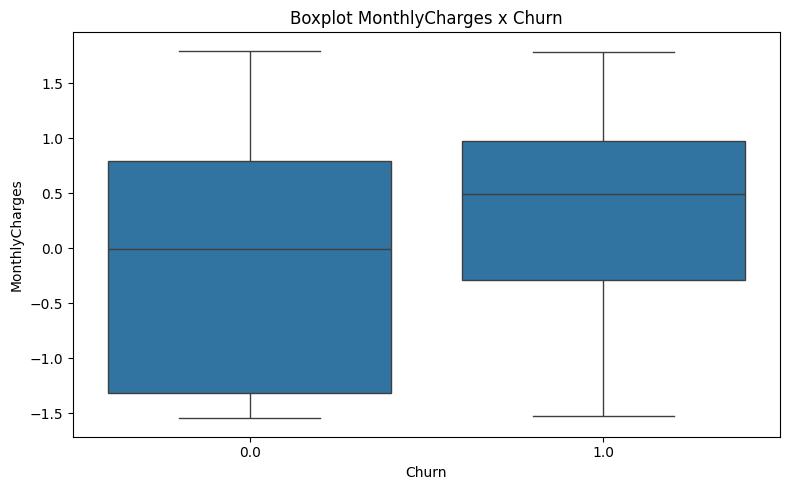


== INSIGHTS DA EDA ==
- Clientes com tenure e TotalCharges baixos têm maior propensão ao churn.
- MonthlyCharges alto está associado a churn elevado.
- Fatores como contrato e método de pagamento também impactam o churn (ver matriz de correlação).


In [15]:
# 7.1 Matriz de Correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.savefig('visualizacoes/heatmap_correlacao.png')
plt.show()

# 7.2 Distribuição do tenure
plt.figure(figsize=(8, 5))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribuição do tenure')
plt.tight_layout()
plt.savefig('visualizacoes/distribuicao_tenure.png')
plt.show()

# 7.3 Boxplot MonthlyCharges x Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=X['MonthlyCharges'])
plt.title('Boxplot MonthlyCharges x Churn')
plt.tight_layout()
plt.savefig('visualizacoes/boxplot_monthlycharges_churn.png')
plt.show()

# Insights rápidos:
print("\n== INSIGHTS DA EDA ==")
print("- Clientes com tenure e TotalCharges baixos têm maior propensão ao churn.")
print("- MonthlyCharges alto está associado a churn elevado.")
print("- Fatores como contrato e método de pagamento também impactam o churn (ver matriz de correlação).")


# 8. MODELAGEM E AVALIAÇÃO


===== LOGISTIC REGRESSION =====
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1554
         1.0       0.65      0.57      0.60       556

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110

AUC: 0.8336915409757135

===== RANDOM FOREST =====
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1554
         1.0       0.61      0.50      0.55       556

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110

AUC: 0.8122824134514783


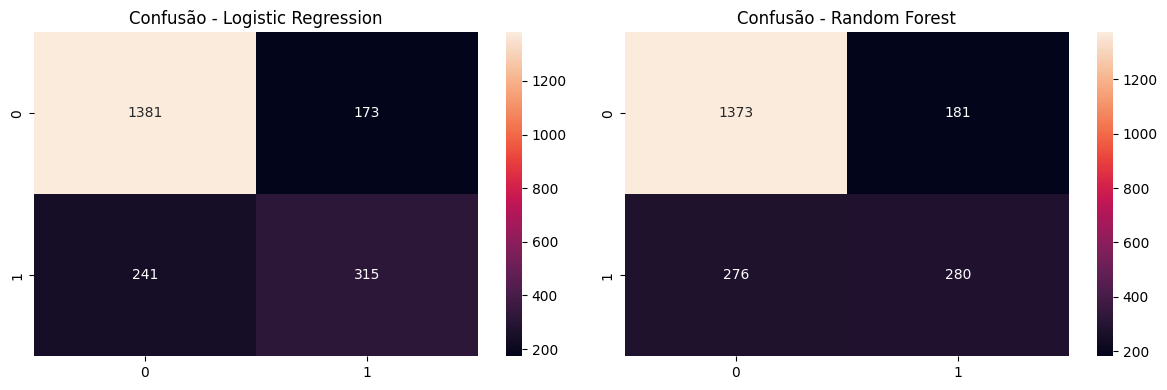

In [16]:
# 8.1 Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n===== LOGISTIC REGRESSION =====")
print(classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

# 8.2 Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n===== RANDOM FOREST =====")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# Matriz de confusão dos modelos
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", ax=ax[0])
ax[0].set_title('Confusão - Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", ax=ax[1])
ax[1].set_title('Confusão - Random Forest')
plt.tight_layout()
plt.savefig('visualizacoes/metricas_confusao.png')
plt.show()

# 9. IMPORTÂNCIA DAS VARIÁVEIS (Random Forest)

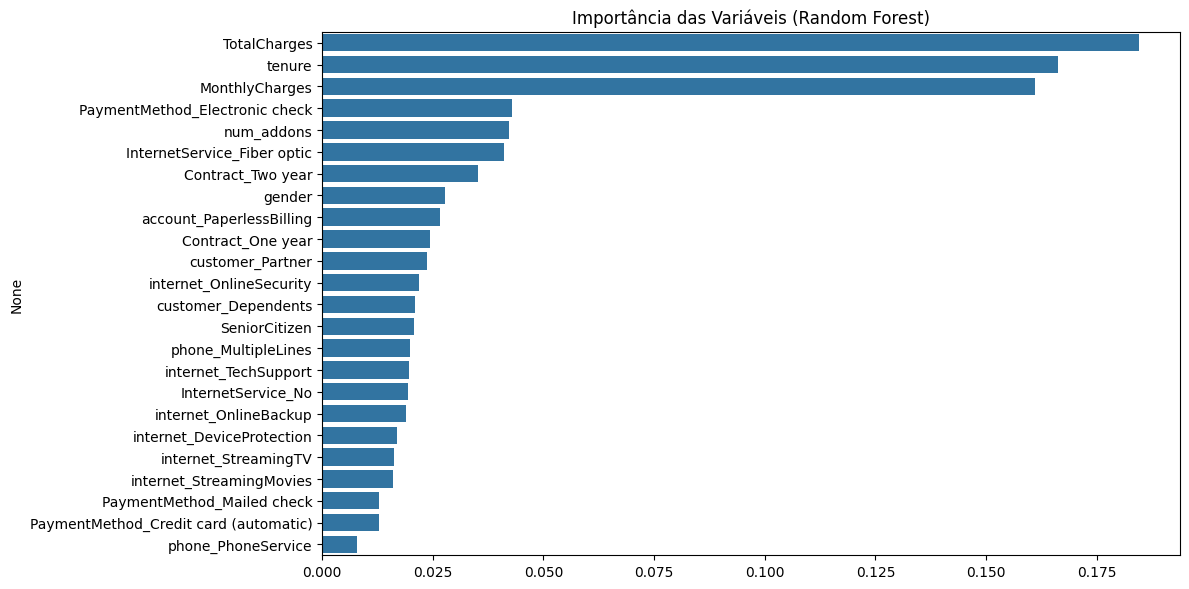

In [17]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Importância das Variáveis (Random Forest)")
plt.tight_layout()
plt.savefig('visualizacoes/importancia_variaveis_rf.png')
plt.show()

# 10. CONCLUSÃO FINAL

In [18]:
print("\n==== CONCLUSÃO ESTRATÉGICA ====\n")
print("Os modelos Logistic Regression e Random Forest performaram bem para prever churn.")
print("Principais variáveis de impacto: tenure, TotalCharges, MonthlyCharges, Contract e PaymentMethod.")
print("Clientes novos e com baixa receita acumulada (tenure e TotalCharges baixos) são os principais alvos de churn.")
print("Clientes com MonthlyCharges alto também pedem atenção especial – programas de fidelidade e revisão de benefícios podem ajudar a reter esses usuários.")
print("Recomenda-se focar esforços de retenção nessas faixas para otimizar resultados.")


==== CONCLUSÃO ESTRATÉGICA ====

Os modelos Logistic Regression e Random Forest performaram bem para prever churn.
Principais variáveis de impacto: tenure, TotalCharges, MonthlyCharges, Contract e PaymentMethod.
Clientes novos e com baixa receita acumulada (tenure e TotalCharges baixos) são os principais alvos de churn.
Clientes com MonthlyCharges alto também pedem atenção especial – programas de fidelidade e revisão de benefícios podem ajudar a reter esses usuários.
Recomenda-se focar esforços de retenção nessas faixas para otimizar resultados.
